In [1]:
import import_ipynb

In [2]:
from env_video_recorder import EnvVideoRecorder

importing Jupyter notebook from env_video_recorder.ipynb


Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiofiles                      22.1.0
aiosqlite                     0.19.0
ale-py                        0.8.1
anyio                         3.6.2
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arrow                         1.2.3
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         23.1.0
AutoROM                       0.4.2
AutoROM.accept-rom-license    0.6.1
Babel                         2.12.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bayesian-optimization         1.4.3
beautifulsoup4                4.12.2
bleach                        6.0.0
blinker                       1.6.2
boto3                         1.26.129
botocore                      1.29.129
brotlipy                      0.7.0
cached-

In [4]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-05-09 20:46:09.575307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import gym 
import random
import numpy as np
#gymnasium.make("ALE/SpaceInvaders-v5") should be 5 for none human version

In [6]:
#pip install gym\[atari\]

In [7]:
env = gym.make('SpaceInvaders-v4',render_mode='rgb_array')
height, width, channels = env.observation_space.shape
actions = env.action_space.n

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [8]:
action_space_size = env.action_space.n


In [9]:
rec = EnvVideoRecorder(env)

In [10]:
rec.reset() 

(array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[80, 89, 22],
         [80, 89, 22],
         [80, 89, 22],
         ...,
         [80, 89, 22],
         [80, 89, 22],
         [80, 89, 22]],
 
        [[80, 89, 22],
         [80, 89, 22],
         [80, 89, 22],
         ...,
         [80, 89, 22],
         [80, 89, 22],
         [80, 89, 22]],
 
        [[80, 89, 22],
         [80, 89, 22],
         [80, 89, 22],
         ...,
         [80, 89, 22],
         [80, 89, 22],
         [80, 89, 22]]], dtype=uint8),
 {'lives': 3, 'episode_frame_number': 0, '

In [11]:
while True:
    rec.render()
    action = 0
    observation, reward, terminated, truncated, info = rec.step(action)
    if terminated:
        break

/opt/anaconda3/envs/AI-Mac/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


In [12]:
rec.save('video/dq-0.mp4') 

In [13]:
rec.embed_jupyter() 

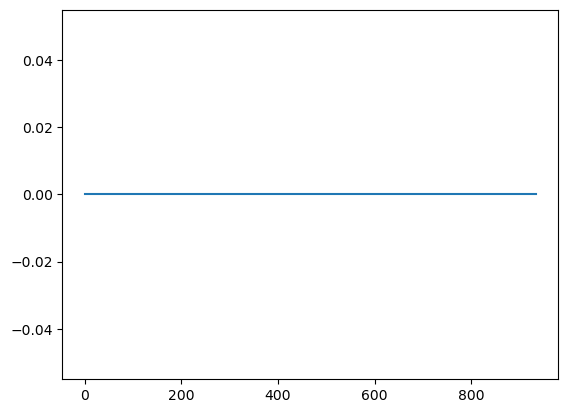

In [14]:
plt.plot(range(len(rec)), rec.rewards()) 

# Preproccesing enviorment 

In [15]:
from gym.wrappers import GrayScaleObservation



In [73]:
#pip install gym\[other\]

In [51]:
env = gym.make('SpaceInvaders-v4', render_mode='rgb_array')

In [168]:
#import gym
from gym.wrappers import FrameStack, GrayScaleObservation, ResizeObservation,AtariPreprocessing, FrameStack

env = gym.make('SpaceInvaders-v4', render_mode='rgb_array')



env = AtariPreprocessing(env,noop_max =30,frame_skip = 1,screen_size = 84, terminal_on_life_loss = True,grayscale_obs= True, grayscale_newaxis= True)

env = FrameStack(env=env, num_stack=4,lz4_compress=True)
# Could use this if env didnt have properties to fix it. 
# Converting to grey
#env = GrayScaleObservation(env, keep_dim=True)
# stack 4 frames
#env = FrameStack(env, num_stack=4, lz4_compress=False)
## Resize Obsercation Space
#env = ResizeObservation(env, [64,64])



In [169]:
env.observation_space.shape

(4, 84, 84, 1)

## Initial deep Q learning model

In [213]:
BUFFER_SIZE = 100_000
GAMMA = 0.995 # discount factor
ALPHA = 0.001 # learning rate
TAU = 0.001 # soft update factor

STEPS_BETWEEN_LEARNING = 4
MINI_BATCH_SIZE = 64

In [214]:
#env = gym.make('SpaceInvaders-v4',render_mode='rgb_array')


In [215]:
state_space_size = env.observation_space.shape
action_space_size = env.action_space.n

In [216]:
 from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
import cv2

In [217]:
state_space_size
state_space_flat = state_space_size

In [218]:
 q_net = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=state_space_size),
    tf.keras.layers.Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(action_space_size, activation='linear')
])


In [219]:
q_net.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 4, 20, 20, 32)     2080      
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 9, 9, 64)       32832     
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 7, 7, 64)       36928     
                                                                 
 flatten_8 (Flatten)         (None, 12544)             0         
                                                                 
 dense_16 (Dense)            (None, 512)               6423040   
                                                                 
 dense_17 (Dense)            (None, 6)                 3078      
                                                                 
Total params: 6,497,958
Trainable params: 6,497,958
No

In [220]:
 target_q_net = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=state_space_size),
    tf.keras.layers.Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(action_space_size, activation='linear')
])

In [221]:
target_q_net.input.shape

TensorShape([None, 4, 84, 84, 1])

In [222]:
optimizer = Adam(learning_rate=ALPHA)

In [223]:
from collections import namedtuple, deque
experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

In [224]:
def loss(experiences, gamma, q_net, target_q_net):
    '''
    y_j = R_j if episode terminates at T_{j+1}, else
    y_j = R_j + gamma max_{a'} Q^(s_{j+1}, a')
    '''
    # unpack experiences into its components
    states, actions, rewards, next_states, done_vals = experiences
    
    # compute max Q^(s,a)
    max_qsa = tf.reduce_max(target_q_net(next_states), axis=-1)
    
    # y = R if episode terminates, else y = R + y max Q^(s,a)
    # note: done_vals is boolean, and (1 - done_vals) == 0 if done_vals == True
    y_targets = rewards + (gamma * max_qsa * (1 - done_vals))
    
    q_values = q_net(states)
    # tf.gather_nd(params, indices) returns `indices` slices of `params`
    q_values = tf.gather_nd(q_values, 
                            tf.stack([tf.range(q_values.shape[0]),
                                      tf.cast(actions, tf.int32)],
                                     axis=1
                                    ))
    
    # compute MSE loss
    return MSE(y_targets, q_values)

In [225]:
def learn(experiences, gamma):
    """
    Fit the Q and Q target networks
    """
    
    # compute loss
    with tf.GradientTape() as tape:
        computed_loss = loss(experiences, gamma, q_net, target_q_net)
        
    # update q_net
    gradients = tape.gradient(computed_loss, q_net.trainable_variables)
    optimizer.apply_gradients(zip(gradients, q_net.trainable_variables))
    
    # update target_q_net
    for target_weights, q_net_weights in zip(target_q_net.weights, q_net.weights):
        target_weights.assign(TAU * q_net_weights + (1.0 - TAU) * target_weights)

In [ ]:
time_begin = time.time()
episodes = 10_000 # how many times we play the game
max_steps = 1_000 # how many actions allowed before 'time out'

score_history = []

avg_points = 100

epsilon = 1.0 # initial epsilon for greedy policy (exploration/exploitation)
epsilon_decay = 0.08
epsilon_min = 0.01

buffer = deque(maxlen=BUFFER_SIZE)

# clone q_net into target_q_net
target_q_net.set_weights(q_net.get_weights())

for i in range(episodes):
    state, _ = env.reset()
    score = 0
    
    for t in range(max_steps):
        state_qn = np.expand_dims(state, axis=0)
        q_values = q_net(state_qn)
        # make epsilon greedy choice
        if random.random() > epsilon:
            # exploitation
            action = np.argmax(q_values.numpy()[0])
        else:
            # exploration
            
            action = random.choice(np.arange(int(env.action_space.n)))
        
        # take action and update buffer
        next_state, reward, done, _, _ = env.step(action)
        buffer.append(experience(state, action, reward, next_state, done))
        
        # check whether this is a learning step
        if (t + 1) % STEPS_BETWEEN_LEARNING == 0 and len(buffer) > MINI_BATCH_SIZE:
            # this is a learning step
            experiences = random.sample(buffer, k=MINI_BATCH_SIZE)
            states = tf.convert_to_tensor(
                np.array([e.state for e in experiences if e is not None]),
                dtype=tf.float32)
            actions = tf.convert_to_tensor(
                np.array([e.action for e in experiences if e is not None]), 
                dtype=tf.float32)
            rewards = tf.convert_to_tensor(
                np.array([e.reward for e in experiences if e is not None]), 
                dtype=tf.float32)
            next_states = tf.convert_to_tensor(
                np.array([e.next_state for e in experiences if e is not None]),
                dtype=tf.float32)
            done_vals = tf.convert_to_tensor(
                np.array([e.done for e in experiences if e is not None]).astype(np.uint8),
                dtype=tf.float32)
            experiences = states, actions, rewards, next_states, done_vals
            learn(experiences, GAMMA)
            
        state = next_state
        score += reward
        
        if done: break
        
    score_history.append(score)
    avg_latest_score = np.mean(score_history[-avg_points:])

    # update epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # display status
    status_message = f'\rEpisode {i + 1} | Total score average of last {avg_points} episodes: {avg_latest_score:.2f}'
    print(status_message, end='')
    if (i + 1) % 10 == 0:
        print(status_message)

    if avg_latest_score >= 200.0:
        print(f"\n\nEnvironment solved in {i+1} episodes!")
        q_net.save('lunar_lander_model.h5')
        break
            
time_end = time.time()
runtime = time_end - time_begin
print(f'\nTotal runtime: {runtime:.2f} sec. ({(runtime/60):.2f} min.)')

Episode 10 | Total score average of last 100 episodes: 33.00
Episode 20 | Total score average of last 100 episodes: 40.50
Episode 30 | Total score average of last 100 episodes: 42.83
Episode 40 | Total score average of last 100 episodes: 46.25
Episode 50 | Total score average of last 100 episodes: 46.20
Episode 60 | Total score average of last 100 episodes: 49.75
Episode 70 | Total score average of last 100 episodes: 51.07
Episode 80 | Total score average of last 100 episodes: 54.12
Episode 90 | Total score average of last 100 episodes: 51.28
Episode 100 | Total score average of last 100 episodes: 52.70
Episode 110 | Total score average of last 100 episodes: 52.05
Episode 120 | Total score average of last 100 episodes: 54.20
Episode 130 | Total score average of last 100 episodes: 56.00
Episode 140 | Total score average of last 100 episodes: 57.20
Episode 150 | Total score average of last 100 episodes: 58.00
Episode 157 | Total score average of last 100 episodes: 57.70

In [ ]:
from gym.wrappers import FrameStack, GrayScaleObservation, ResizeObservation,AtariPreprocessing, FrameStack

env = gym.make('SpaceInvaders-v4', render_mode='rgb_array')



env = AtariPreprocessing(env,noop_max =30,frame_skip = 1,screen_size = 84, terminal_on_life_loss = True,grayscale_obs= True, grayscale_newaxis= True)

env = FrameStack(env=env, num_stack=4,lz4_compress=True)

In [190]:
env.observation_space.shape

(4, 84, 84, 1)

In [198]:
state, _, terminated, _, _ = env.step(action)

In [204]:
total_rewardos = []

In [200]:
state.shape

(4, 84, 84, 1)

In [211]:
env.reset()
while True:
    #state = env.render()
    state = np.expand_dims(state, axis=0)
    #print(state.shape)
    q_values = q_net(state)
    action = np.argmax(q_values.numpy()[0])
    #print(str(action))
    state, reward, terminated, _, _ = env.step(action)
    #print(reward)
    total_rewardos.append(reward)
    
    if terminated:
        break
print ("Ai got reward of" + str(sum(total_rewardos)))

3
0
1
5
5
0
0
0
0
5
5
0
0
0
0
1
5
5
0
0
0
1
5
2
0
0
1
5
5
0
0
0
0
5
5
5
5
2
2
2
2
4
4
4
2
2
0
2
2
2
5
5
1
1
1
5
5
5
0
4
0
5
0
4
5
4
4
4
4
4
0
0
0
4
4
4
5
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Ai got reward of140.0


# Q learning netowrk

In [68]:
#env = gym.make('SpaceInvaders-v4',render_mode='rgb_array')


In [145]:
from gym.wrappers import FrameStack, GrayScaleObservation, ResizeObservation,AtariPreprocessing

env = gym.make('SpaceInvaders-v4', render_mode='rgb_array')



env = AtariPreprocessing(env,noop_max =30,frame_skip = 1,screen_size = 84, terminal_on_life_loss = True,grayscale_obs= True, grayscale_newaxis= True)

#env = FrameStack(env=env, num_stack=4,lz4_compress=True)


In [146]:
action_size = env.action_space.n # action_space is 6 but we try to remove fire left and fire right
state_size = env.observation_space.shape
q_table = np.zeros((state_size[0], state_size[1], state_size[2], action_size))

In [147]:
print(q_table.shape)

(84, 84, 1, 6)


In [148]:
rewards_all_episodes = []

In [149]:
#state_counts = [0] * (state_space_size[0], state_space_size[1], state_space_size[2], action_size)


In [150]:
exploration_count = 0
exploitation_count = 0
last_reward_sum = 0 # this is for step episode by eposode obs

In [151]:
num_episodes = 4000
max_steps_per_episode = 1000

learning_rate = 0.1
discount_rate = 0.6

exploration_rate = 1
max_exploration_rate = 0.9
min_exploration_rate = 0.05
exploration_decay_rate = 0.004

In [188]:
env.action_space.sample()

4

In [152]:
def try_hyperparameters(discount_rate,learning_rate,exploration_decay_rate):
    rewards_all_episodes = []
    
    exploration_count = 0
    exploitation_count = 0
    last_reward_sum = 0
    
    exploration_rate = 1
    max_exploration_rate = 0.9
    min_exploration_rate = 0.05
    num_episodes = 2000
    max_steps_per_episode = 1000
    # Q-learning algorithm

    for episode in range(num_episodes):
        state, _ = env.reset()

        done = False
        rewards_current_episode = 0

        for step in range(max_steps_per_episode):

            # Exmploration-exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                exploitation_count += 1

                action = np.argmax(q_table[state[0],state[1],state[2],:])
            else:
                exploration_count += 1
                action = action = random.choice(np.arange(int(env.action_space.n)))

            #print(action)
            new_state, reward, done, truncated, info = env.step(action)

            # Update Q-table for Q(s,a)
            #print("state: " + str(state) + " Action: " + str(action))
            try: 
                q_table[state[0],state[1],state[2], action] = q_table[state[0],state[1],state[2], action] * (1 - learning_rate) + \
                    learning_rate * (reward + discount_rate * np.max(q_table[new_state[0],new_state[1],new_state[2],:]))
            except: 
                continue
                #print(str(state[0]), str(state[1]) + str(state[2]))

            state = new_state
            #state_counts[np.prod(state)] += 1
            rewards_current_episode += reward

            if done:
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate + \
            (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

        rewards_all_episodes.append(rewards_current_episode)

    _ = """    
        if np.sum(rewards_all_episodes) > last_reward_sum:
            last_reward_sum = np.sum(rewards_all_episodes)
            print(episode, state, action, last_reward_sum)
            print(q_table)
            input('press enter to continue')
    """
    return sum(rewards_all_episodes)

# Calculate and print the average reward per thousand episodes

rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1)
count = 1_000

print('*** Average reward per thousand episodes ***')
for r in rewards_per_thousand_episodes:
    print(count, ':', str(sum(r/1_000)))
    count += 1_000
    
print('\n\n\n*** Q-table ***')
print(q_table)

#print('\n\n\n*** State counts ***')
#print(state_counts)

print('\n\n\n*** Exploration/Exploitation count ***')
print(exploration_count, exploitation_count)

In [153]:
#env.close()

In [154]:
#env = gym.make('SpaceInvaders-v4',render_mode='human')

rec = EnvVideoRecorder(env)
rec.reset()
rec.render()

for episode in range(10):
    state, _ = rec.reset()
    done = False
    total_reward = []
    print(f'*** EPISODE {episode} ***')
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        rec.render()
        
        #time.sleep(0.1)
        
        action = np.argmax(q_table[state[0],state[1],state[2],:])
        print(f'{action}', end='')
        
        new_state, reward, done, truncated, info = rec.step(action)
        total_reward.append(reward)
        if done:
            rec.render()
            if reward == 1:
                print('reward' + str(sum(total_reward)))
                print('\nYEEAAHH!!')
            else:
                print('reward' + str(sum(total_reward)))
                print('\nBUUUUH!!!')
            #time.sleep(1)
            break
            
        state = new_state

rec.save('video/frozen-lake.mp4')

In [155]:
## in general Ai either goes action 4 or 5 all out which is either rightFire or leftfire, so we i wanna try

In [156]:
env.observation_space.shape

(84, 84, 1)

In [157]:
## Randomized search
exploration_decay_rate = 0
for i in range(50):
    learning_rate = random.uniform(0.001, 0.2)
    discount_rate = random.uniform(0.5,0.9)
    exploration_decay_rate = random.uniform(0.0002,0.02)
    #print("learning_rate: "+ str(learning_rate) + " discount_rate_ "+ str(discount_rate) + " exploration_decay_rate" + str(exploration_decay_rate))
    rewards = try_hyperparameters(learning_rate=learning_rate,discount_rate=discount_rate, exploration_decay_rate = exploration_decay_rate)
    print("With learning rate: " + str(learning_rate) + " Discount_rate: " + str(discount_rate) + " exploration_decay_rate: " + str(exploration_decay_rate) + " Got the reward: " + str(rewards))

KeyboardInterrupt: 

In [158]:
#learning_rate = 0.1
#discount_rate = 0.6
#exploration_decay_rate = 0.004

In [ ]:
#grid Search 
discount_rates = [0.6]
learning_rates = [0.01,0.03,0.05,0.07,0.1]
exploration_decay_rates = [0.001,0.01,0.1]

for discount_rate in discount_rates:
    for learning_rate in learning_rates:
        for exploration_decay_rate in exploration_decay_rates:
            rewards = try_hyperparameters(learning_rate=learning_rate,discount_rate=discount_rate, exploration_decay_rate = exploration_decay_rate)
            print("With learning rate: " + str(learning_rate) + " Discount_rate: " + str(discount_rate) + " exploration_decay_rate: " + str(exploration_decay_rate) + " Got the reward: " + str(rewards))
        

In [159]:
 ## Test run with found hyperparmmeters using 10000 episodes 
rewards_all_episodes = []
    
learning_rate = 0.01
discount_rate = 0.6 
exploration_decay_rate = 0.001
    
exploration_count = 0
exploitation_count = 0
last_reward_sum = 0
    
exploration_rate = 1
max_exploration_rate = 0.9
min_exploration_rate = 0.05
num_episodes = 10_000
max_steps_per_episode = 1000
# Q-learning algorithm

for episode in range(num_episodes):
    state, _ = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):

            # Exmploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            exploitation_count += 1

            action = np.argmax(q_table[state[0],state[1],state[2],:])
        else:
            exploration_count += 1
            action = env.action_space.sample()
        #print(action)
        new_state, reward, done, truncated, info = env.step(action)

            # Update Q-table for Q(s,a)
            #print("state: " + str(state) + " Action: " + str(action))
        try: 
            q_table[state[0],state[1],state[2], action] = q_table[state[0],state[1],state[2], action] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate * np.max(q_table[new_state[0],new_state[1],new_state[2],:]))
        except: 
            continue
                #print(str(state[0]), str(state[1]) + str(state[2]))

        state = new_state
        #state_counts[np.prod(state)] += 1
        rewards_current_episode += reward

        if done:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    rewards_all_episodes.append(rewards_current_episode)

    _ = """    
        if np.sum(rewards_all_episodes) > last_reward_sum:
            last_reward_sum = np.sum(rewards_all_episodes)
            print(episode, state, action, last_reward_sum)
            print(q_table)
            input('press enter to continue')
    """

In [160]:
rec = EnvVideoRecorder(env)
rec.reset()
rec.render()

/opt/anaconda3/envs/AI-Mac/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[80, 89, 22],
        [80, 89, 22],
        [80, 89, 22],
        ...,
        [80, 89, 22],
        [80, 89, 22],
        [80, 89, 22]],

       [[80, 89, 22],
        [80, 89, 22],
        [80, 89, 22],
        ...,
        [80, 89, 22],
        [80, 89, 22],
        [80, 89, 22]],

       [[80, 89, 22],
        [80, 89, 22],
        [80, 89, 22],
        ...,
        [80, 89, 22],
        [80, 89, 22],
        [80, 89, 22]]], dtype=uint8)

In [161]:
for episode in range(10):
    state, _ = rec.reset()
    done = False
    total_reward = []
    print(f'*** EPISODE {episode} ***')
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        #rec.render()
        
        #time.sleep(0.1)
        
        action = np.argmax(q_table[state[0],state[1],state[2],:])
        print(f'{action}', end='')
        
        new_state, reward, done, truncated, info = rec.step(action)
        total_reward.append(reward)
        if done:
            rec.render()
            if reward == 1:
                print('reward' + str(sum(total_reward)))
                print('\nYEEAAHH!!')
            else:
                print('reward' + str(sum(total_reward)))
                print('\nBUUUUH!!!')
            #time.sleep(1)
            break
            
        state = new_state

rec.save('video/frozen-lake.mp4')

*** EPISODE 0 ***
444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444reward115.0

BUUUUH!!!
*** EPISODE 1 ***
444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444reward115.0

BUUUUH!!!
*** EPISODE 2 ***
444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444reward115.0

BUUUUH!!!
*** EPISODE 3 ***
4444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444

44444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444reward115.0

BUUUUH!!!


In [ ]:
rec.embed_jupyter() 